<a href="https://colab.research.google.com/github/vishalrathod7453/-IPL-2025-Analysis/blob/main/IPL_Analysisi_2025_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IPL  2025 Analysis in Batsman

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
vr =pd.read_csv('/content/ipl_batsman 2025.csv')

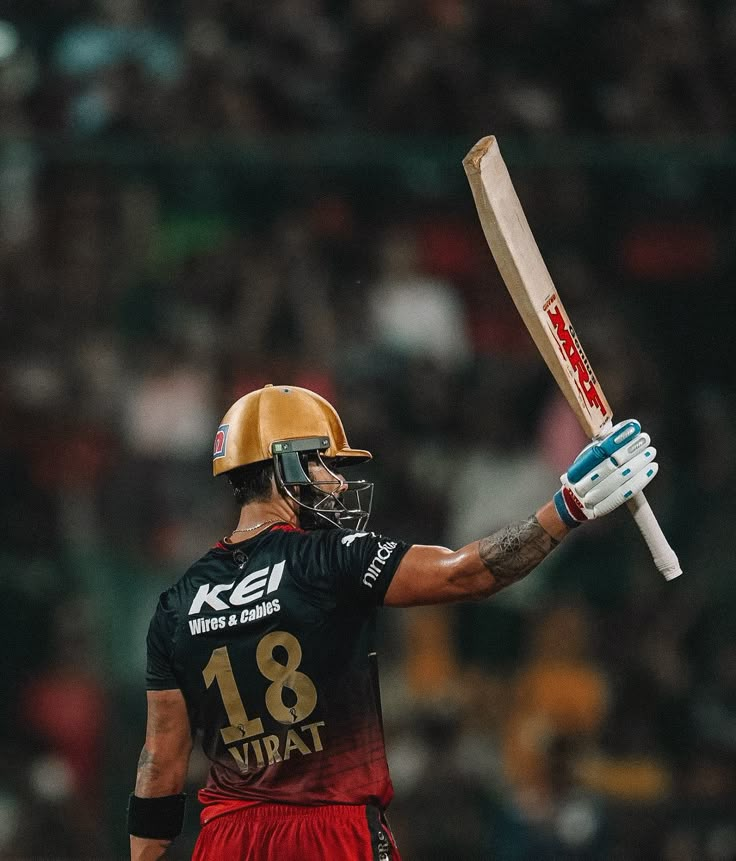

In [ ]:
vr

**EDA**

In [ ]:
vr.to_dict()

In [ ]:
vr.head()

In [ ]:
vr.describe()

In [ ]:
vr.info()

In [ ]:
vr.shape

In [ ]:
vr.isnull().sum()

In [ ]:
vr.duplicated().sum()

In [ ]:
vr.dropna(inplace=True)

In [ ]:

vr.sum()

In [ ]:
vr.isnull().sum()

it shows there are no null values in it


In [ ]:
vr.duplicated().sum()

from which we can see there are no null values



Perform to chart

**1. Matches partishian **

In [ ]:
matches_per_player = vr["striker"].value_counts().head(10)
matches_per_player.plot(kind="bar", figsize=(8,4))
plt.title("Most Frequently Appearing Batsmen")
plt.ylabel("Innings Played")
plt.show()

1. Players with higher appearances indicate consistent selection and trust from team management.




```
# This is formatted as code
```

  2. Runs Scored Distribution
*

  ##. To understand how runs are spread across players and identify skewness.



In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(vr["runs_scored"], bins=30, kde=True)
plt.title("Distribution of Runs Scored by Batsmen")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

* Most players score low to moderate runs

* A small number of players contribute very high runs

* Distribution is right-skewed, common in T20 cricket



**3. Strike rate Analysis**

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(vr["strike_rate"], bins=30, kde=True)
plt.title("Strike Rate Distribution")
plt.xlabel("Strike Rate")
plt.ylabel("Frequency")
plt.show()

* Majority of batsmen operate in the 120–160 strike rate range

* Few players play ultra-aggressive roles (>180 SR)

**4. Run vs strike rate relationship**

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(x="runs_scored", y="strike_rate", data=vr)
plt.title("Relationship between Runs Scored and Strike Rate")
plt.xlabel("Runs Scored")
plt.ylabel("Strike Rate")
plt.show()

* High strike rate does not always mean high runs

* Top performers combine volume + efficiency

* Useful for identifying impact players




In [ ]:
vr["Boundaries"] = vr["fours"] + vr["sixes"]

# Aggregate per player
player_boundaries = (
    vr
    .groupby("striker", as_index=False)["Boundaries"]
    .sum()
)

In [ ]:
top10 = player_boundaries.sort_values(
    "Boundaries", ascending=False
).head(10)

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(data=top10, x="Boundaries", y="striker")

plt.title("Top 10 Boundary Hitters – IPL 2025")
plt.xlabel("Total Boundaries (Fours + Sixes)")
plt.ylabel("Player")

plt.tight_layout()
plt.show()


* To identify the most aggressive batsmen, we aggregated total boundaries (fours + sixes) scored by each player across the season. After grouping by player and summing boundary counts, the top 10 boundary hitters were visualized using a horizontal bar chart for better readability.

* This analysis highlights players who consistently contribute quick runs and play a key role in shifting match momentum in T20 cricket.

6. Ball paced vs **runs**

In [ ]:
sns.scatterplot(
    data=vr,x="balls_faced",y="runs_scored",
    alpha=0.7
)
plt.title("Runs vs Balls Faced")
plt.xlabel("Balls Faced")
plt.ylabel("Runs")
plt.show()


* Linear relationship indicates consistency

* Outliers show high strike rate innings



In [ ]:
top_scorers = vr.sort_values("runs_scored", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_scorers, x="runs_scored", y="striker")
plt.title("Top 10 Run Scorers – IPL 2025")
plt.xlabel("Runs")
plt.ylabel("Player")
plt.show()


* this shows us the highest score scored by an individual player in a single inning
* also shows player who often plays anchor or consistent finisher roles


**7 .Batting position Analysis**

In [ ]:
sns.boxplot(data=vr, x='batting_position', y='runs_scored')
plt.title('Batting Position vs Runs Scored')
plt.show()

* Top-order batsmen generally score higher due to more balls faced.
* Middle and lower order players play specialized finishing roles.


**Running Between the Wickets**

In [ ]:
vr["running_runs"] = (
    vr["singles"]
    + 2*vr["doubles"]
    + 3*vr["triples"]
    + 5*vr["fives"]
)

sns.scatterplot(
    data=vr,
    x="running_runs",
    y="runs_scored",
    alpha=0.6
)
plt.title("Running Runs vs Total Runs")
plt.show()

* Running between the wickets plays a vital role for anchors and players on slower pitches.


**9. Teams-Vice Batting Strenth**

In [ ]:
team_runs = vr.groupby("player_team")["runs_scored"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
team_runs.plot(kind="bar")
plt.title("Average Runs per Batsman in an innings (Team-wise)")
plt.ylabel("Average Runs")
plt.show()

* Teams with higher averages show batting depth

* Useful indicator of team dominance



10.Dismissal Analysis¶
**bold text**

In [ ]:
vr["dismissal_type"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Dismissal Types Distribution")
plt.show()
dismissal_sr = vr.groupby("dismissal_type")["strike_rate"].mean().sort_values()

dismissal_sr.plot(kind="bar", figsize=(10,4))
plt.title("Average Strike Rate by Dismissal Type")
plt.show()


* Certain dismissal types are associated with aggressive batting.
* This helps distinguish between attacking and defensive batting styles.


11.Correlation Between Batting Metrics¶
**bold text**

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    vr[["runs_scored", "balls_faced", "strike_rate", "fours", "sixes"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix – Batting Metrics")
plt.show()

* Runs strongly correlate with balls faced

* Sixes show stronger impact on strike rate

* Useful for feature selection in ML models



Key EDA Takeaways¶

* Batting performance is highly skewed, with few elite contributors

* Strike rate alone does not define success; consistency matters

* Boundary hitters play a critical role in T20 dynamics

* Team-wise analysis highlights batting depth and balance

* These insights can support player ranking, match prediction, and team strategy models


